<a href="https://colab.research.google.com/github/KravchenkoJenia/2022-knu-yolo/blob/main/Kravchenko.task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda, Compose
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



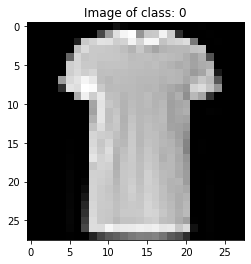

In [ ]:
# Lest read a random image from the dataset and draw it
image, label = training_data[17]
plt.imshow(image[0], "gray")
plt.title(f"Image of class: {label}")
plt.show()

In [ ]:
# Lets check image shape
image.shape

torch.Size([1, 28, 28])

In [ ]:
# Lets see all the classes available
training_data.classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

Task 1

Create a DataLoader objects for train and test


In [ ]:
trd = DataLoader(training_data, batch_size=32, shuffle=True)
tsd = DataLoader(test_data, batch_size=32, shuffle=False)

<class 'torch.Tensor'> <class 'torch.Tensor'>


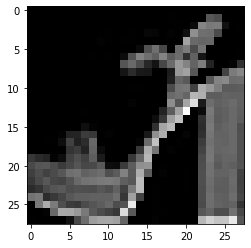

Label: 5


In [ ]:
train_features, train_labels = next(iter(trd))
print(type(train_features), type(train_labels))
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

In [ ]:
device = torch.device('cpu')

Task 2

Create a Neural Network

In [31]:
model = nn.Sequential(nn.Linear(784, 512),
                      nn.ReLU(),
                      nn.Dropout(0.2),
                      nn.Linear(512, 256),
                      nn.ReLU(),
                      nn.Dropout(0.2),
                      nn.Linear(256, 128),
                      nn.ReLU(),
                      nn.Dropout(0.2),
                      nn.Linear(128, 32),
                      nn.ReLU(),
                      nn.Dropout(0.2),
                      nn.Linear(32, 10),
                      nn.LogSoftmax(dim = 1)
                     )

print (model)

Sequential(
  (0): Linear(in_features=784, out_features=512, bias=True)
  (1): ReLU()
  (2): Dropout(p=0.2, inplace=False)
  (3): Linear(in_features=512, out_features=256, bias=True)
  (4): ReLU()
  (5): Dropout(p=0.2, inplace=False)
  (6): Linear(in_features=256, out_features=128, bias=True)
  (7): ReLU()
  (8): Dropout(p=0.2, inplace=False)
  (9): Linear(in_features=128, out_features=32, bias=True)
  (10): ReLU()
  (11): Dropout(p=0.2, inplace=False)
  (12): Linear(in_features=32, out_features=10, bias=True)
  (13): LogSoftmax(dim=1)
)


Task 3

Specify loss and optimizer

In [20]:
import torch.optim as optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

Task 3

Train model using for loop

In [46]:
train_losses, test_losses, train_accuracy = [], [], []

preds = torch.tensor([])
true_vals = torch.tensor([])

for e in range(epochs):
    running_loss = 0
    for images, labels in trd:
    # Flatten Fashion-MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
    # Training pass
        optimizer.zero_grad()
    
        output = model.forward(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
    
        running_loss += loss.item()
    else:
        test_loss = 0
        accuracy = 0
    
    # Turn off gradients for validation, saves memory and computation
    with torch.no_grad():
      # Set the model to evaluation mode
        model.eval()
      
      # Validation pass
        for images, labels in tsd:
            true_vals = torch.cat((true_vals, labels), 0)
            images = images.view(-1, 784)
            log_ps = model(images)
            test_loss += criterion(log_ps, labels)
        
            ps = torch.exp(log_ps)
            _, pred_label = torch.max(ps, dim = 1)
            preds = torch.cat((preds, pred_label), 0)
            top_p, top_class = ps.topk(1, dim = 1)
            equals = top_class == labels.view(*top_class.shape)
            accuracy += torch.mean(equals.type(torch.FloatTensor))
            if (e == 0):
                true_values = true_vals
                predictions = preds
                

    model.train()
    train_losses.append(running_loss/len(trd))
    test_losses.append(test_loss/len(tsd))
    train_accuracy.append(accuracy/len(tsd))
    
    print("Epoch: {}/{}..".format(e+1, epochs),
          "Training loss: {:.3f}..".format(running_loss/len(trd)),
          "Test loss: {:.3f}..".format(test_loss/len(tsd)),
          "Test Accuracy: {:.3f}".format(accuracy/len(tsd)))

Epoch: 1/10.. Training loss: 2.307.. Test loss: 2.307.. Test Accuracy: 0.100
Epoch: 2/10.. Training loss: 2.307.. Test loss: 2.307.. Test Accuracy: 0.100
Epoch: 3/10.. Training loss: 2.307.. Test loss: 2.307.. Test Accuracy: 0.100
Epoch: 4/10.. Training loss: 2.307.. Test loss: 2.307.. Test Accuracy: 0.100
Epoch: 5/10.. Training loss: 2.307.. Test loss: 2.307.. Test Accuracy: 0.100
Epoch: 6/10.. Training loss: 2.307.. Test loss: 2.307.. Test Accuracy: 0.100
Epoch: 7/10.. Training loss: 2.307.. Test loss: 2.307.. Test Accuracy: 0.100
Epoch: 8/10.. Training loss: 2.307.. Test loss: 2.307.. Test Accuracy: 0.100
Epoch: 9/10.. Training loss: 2.307.. Test loss: 2.307.. Test Accuracy: 0.100
Epoch: 10/10.. Training loss: 2.307.. Test loss: 2.307.. Test Accuracy: 0.100


Task 4

Report accuracy from train set, and test set independently

In [49]:
preds_train = torch.tensor([])
vals_train = torch.tensor([])
correct = 0
with torch.no_grad():
  for X, y in trd:
    X = X.view(-1, 784)
    out = model.forward(X)
    _, preds = torch.max(out, dim=1)
    correct += (preds == y).float().sum()
    preds_train = torch.cat((preds_train, model.forward(X)), 0)
    vals_train  = torch.cat((vals_train , y), 0)
train_acc = correct / len(training_data)
print("Accuracy on a train set: {:.0f}%".format(100*train_acc))

Accuracy on a train set: 10%


In [51]:
preds_test = torch.tensor([])
vals_test  = torch.tensor([])
correct = 0
with torch.no_grad():
  for X, y in tsd:
    X = X.view(-1, 784)
    out = model.forward(X)
    _, preds = torch.max(out, dim=1)
    correct += (preds == y).float().sum()
    preds_test = torch.cat((preds_test, model.forward(X)), 0)
    vals_test  = torch.cat((vals_test , y), 0)
test_acc = correct / len(test_data)
print("Accuracy on a test set: {:.0f}%".format(100*test_acc))

Accuracy on a test set: 10%


Task 5

Report confussion matrix for the test set

Expected format:

array([
  [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [52]:
_, preds = torch.max(preds_test, dim=1)
conf_matrix = confusion_matrix(vals_test.numpy(), preds.numpy())
print('Confusion matrix for the test set')
print(conf_matrix)

Confusion matrix for the test set
[[  0   0   0   0   0 992   0   0   0   8]
 [  0   0   0   0   0 991   0   0   0   9]
 [  0   0   0   0   0 981   0   0   0  19]
 [  0   0   0   0   0 992   0   0   0   8]
 [  0   0   0   0   0 975   0   0   0  25]
 [  0   0   0   0   0 994   0   0   0   6]
 [  0   0   0   0   0 982   0   0   0  18]
 [  0   0   0   0   0 986   0   0   0  14]
 [  0   0   0   0   0 983   0   0   0  17]
 [  0   0   0   0   0 984   0   0   0  16]]
